In [1]:
# Lausanne, the 10th of October 2021
# Julien Ruppen, PhD

# This notebook provides all the details about the processing steps
# performed in order to calculate COVID19 Case Fatality Rate (CFR)
# by age groupe in Switzerland from the data available in
# in Office Federal de la Santé Publique (OFSP)

# CFR is calculated by dividing the number of death by the number
# of diagnosed cases ( refered to as "positives case" from now one )

# This is notebook 3/3
# We will calculate here COVID case fatality rate


# Original Covid-19 data can be found at:
# https://www.covid19.admin.ch/fr/overview
#
# A copy of these data is available at github repo:
# https://

# Julien RUPPEN

# PrivateTeacher
# Cours Privés de Science
# www.privateteacher.ch

# Julien.Ruppen@PrivateTeacher.CH

In [2]:
# Conditions d'exploitation, Copyright
# https://www.bfs.admin.ch/bfs/fr/home/ofs/statistique-publique/copyright.html

In [3]:
# Load plotly for interactive graph
import plotly.graph_objects as go

# Load panda for dataframe manipulation
import pandas as pd

# Load module to access current date
from datetime import datetime

# Load this module to export graph into picture
from IPython.display import Image

In [6]:
# We read the data prepared in the notebook 1 and 2

#today = datetime.today().date()

# Number of cases by age group in switzerland
cases_filename = 'COVID-Cases-Switzerland-by-Age-Groups.csv'
cases_ch_age_gp = pd.read_csv(cases_filename,sep='\t')

# Number of death by age group in switzerland
death_filename = 'COVID-Death-Switzerland-by-Age-Groups.csv'
death_ch_age_gp = pd.read_csv(death_filename,sep='\t')

In [7]:
# We now create two dataframes

# One to store COVID case fatality rate for each age group
case_fatality_rate = pd.DataFrame()

# One to store the relative contribution of each age group
# to the total CFR
case_fatality_rate_contribution = pd.DataFrame()

In [8]:
# We calculate COVID case fatality rate for each age group

case_fatality_rate['00'] = death_ch_age_gp['00'].cumsum() / cases_ch_age_gp['00'].cumsum() * 100
case_fatality_rate['10'] = death_ch_age_gp['10'].cumsum() / cases_ch_age_gp['10'].cumsum() * 100
case_fatality_rate['20'] = death_ch_age_gp['20'].cumsum() / cases_ch_age_gp['20'].cumsum() * 100
case_fatality_rate['30'] = death_ch_age_gp['30'].cumsum() / cases_ch_age_gp['30'].cumsum() * 100
case_fatality_rate['40'] = death_ch_age_gp['40'].cumsum() / cases_ch_age_gp['40'].cumsum() * 100
case_fatality_rate['50'] = death_ch_age_gp['50'].cumsum() / cases_ch_age_gp['50'].cumsum() * 100
case_fatality_rate['60'] = death_ch_age_gp['60'].cumsum() / cases_ch_age_gp['60'].cumsum() * 100
case_fatality_rate['70'] = death_ch_age_gp['70'].cumsum() / cases_ch_age_gp['70'].cumsum() * 100
case_fatality_rate['80'] = death_ch_age_gp['80'].cumsum() / cases_ch_age_gp['80'].cumsum() * 100

In [9]:
# Total CFR at a given time is given by the sum of all death over
# the sum of all positive case
case_fatality_rate['Total'] = death_ch_age_gp['CumAgeSum'] / cases_ch_age_gp['CumAgeSum'] * 100

# Note:
# !! CFR of each age group does not sum up to total CFR !!

In [10]:
# We set the index of the dataframe with a regular date
case_fatality_rate.index = cases_ch_age_gp['wednes_date']

In [11]:
# We display the content of this dataframe
# This is the COVID CFR for each age group

case_fatality_rate.head(5)

,00,10,20,30,40,50,60,70,80,Total
wednes_date,,,,,,,,,,
2020-02-26,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-03-04,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.960784,5.555556,0.000000,0.692841
2020-03-11,0.0,0.0,0.0,0.232558,0.000000,0.182149,0.906344,2.372881,7.207207,1.038961
2020-03-18,0.0,0.0,0.0,0.074074,0.132188,0.200904,0.728745,3.441084,9.512195,1.375203
2020-03-25,0.0,0.0,0.0,0.088067,0.075216,0.253450,1.509769,5.660377,13.325740,2.292471


In [12]:
# We now save this dataframe into a file

today = datetime.today().date()
filename = str(today)+'-COVID-Case-Fatality-Rate-Switzerland-by-Age-Groups'+'.csv'
case_fatality_rate.to_csv(filename, sep='\t')

In [13]:
# We calculate the relative contribution of each age group
# to the total COVID case fatality rate

case_fatality_rate_contribution['00'] = death_ch_age_gp['00'].cumsum() / cases_ch_age_gp['CumAgeSum'] * 100
case_fatality_rate_contribution['10'] = death_ch_age_gp['10'].cumsum() / cases_ch_age_gp['CumAgeSum'] * 100
case_fatality_rate_contribution['20'] = death_ch_age_gp['20'].cumsum() / cases_ch_age_gp['CumAgeSum'] * 100
case_fatality_rate_contribution['30'] = death_ch_age_gp['30'].cumsum() / cases_ch_age_gp['CumAgeSum'] * 100
case_fatality_rate_contribution['40'] = death_ch_age_gp['40'].cumsum() / cases_ch_age_gp['CumAgeSum'] * 100
case_fatality_rate_contribution['50'] = death_ch_age_gp['50'].cumsum() / cases_ch_age_gp['CumAgeSum'] * 100
case_fatality_rate_contribution['60'] = death_ch_age_gp['60'].cumsum() / cases_ch_age_gp['CumAgeSum'] * 100
case_fatality_rate_contribution['70'] = death_ch_age_gp['70'].cumsum() / cases_ch_age_gp['CumAgeSum'] * 100
case_fatality_rate_contribution['80'] = death_ch_age_gp['80'].cumsum() / cases_ch_age_gp['CumAgeSum'] * 100

In [14]:
# Relative contribution of each age group sum up to the total CFR
tmp_sum = case_fatality_rate_contribution.sum(axis=1).tolist()
case_fatality_rate_contribution['Total'] = tmp_sum

In [15]:
# We set the index of the dataframe with a regular date
case_fatality_rate_contribution.index = cases_ch_age_gp['wednes_date']

In [16]:
# We display the content of this dataframe
# This is the contribution of each age group
# to the total CFR

case_fatality_rate_contribution.head(5)

,00,10,20,30,40,50,60,70,80,Total
wednes_date,,,,,,,,,,
2020-02-26,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-03-04,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.230947,0.461894,0.000000,0.692841
2020-03-11,0.0,0.0,0.0,0.037106,0.000000,0.037106,0.111317,0.259740,0.593692,1.038961
2020-03-18,0.0,0.0,0.0,0.010828,0.021657,0.043313,0.097455,0.357336,0.844613,1.375203
2020-03-25,0.0,0.0,0.0,0.012066,0.012066,0.054295,0.205116,0.597249,1.411680,2.292471


In [17]:
# We now save this dataframe into a file

today = datetime.today().date()
filename = str(today)+'-COVID-Case-Fatality-Rate-Switzerland-Contribution-by-Age-Groups'+'.csv'
case_fatality_rate_contribution.to_csv(filename, sep='\t')

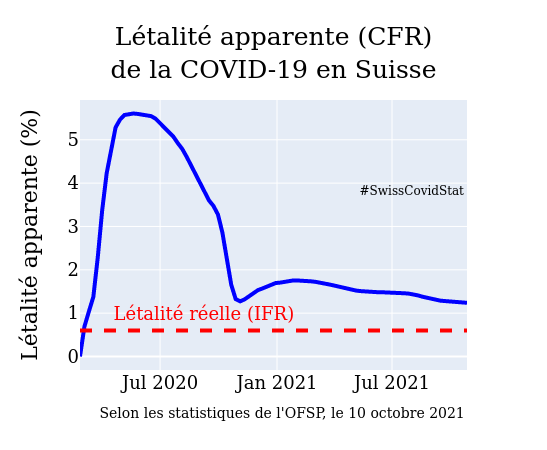

In [34]:
# A quick test to verify that the total CFR obtained
# using the two different routes are actually the same:

graph_title = "Létalité apparente (CFR)<br>de la COVID-19 en Suisse"
graph_yaxis = "Létalité apparente (%)"
picture_name = "CFR-Letalité-en-Suisse-Logo"

ofsp_copyright = "Selon les statistiques de l'OFSP, le 10 octobre 2021"

fig = go.Figure()

fig.add_trace(go.Scatter(x=case_fatality_rate.index, y=case_fatality_rate['Total'],
                    line=dict(width=4,color='blue'),
                    name='Tot'))

#fig.add_trace(go.Scatter(x=case_fatality_rate_contribution.index, y=case_fatality_rate_contribution['Total'],
#                    line=dict(width=3,color='red'),
#                    name='Tot'))


# Add image
fig.add_layout_image(
    dict(
        source="https://www.privateteacher.ch/sites/default/files/2021-08/PrivateTeacher-300px-Square-Logo-WhithBG.png",
        xref="paper", yref="paper",
        #x=1.13, y=1.03,
        x=0.84, y=0.98,
        sizex=0.25, sizey=0.25,
        #xanchor="right", yanchor="bottom"
    )
)

fig.add_annotation(
    text="#SwissCovidStat",
    xref="paper", yref="paper",
    x=1, y=0.7, showarrow=False,
    font=dict(
        size=12,
    )
)

fig.add_annotation(
    text=ofsp_copyright,
    xref="paper", yref="paper",
    x=1, y=-0.2, showarrow=False,
    font=dict(
        size=14,
    )
)

fig.update_layout(

    showlegend=False,
    
    title={
        'text': graph_title,
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    
    #xaxis_title="log(n)",
    yaxis_title=graph_yaxis,
    #legend_title="Asset",
    
    font=dict(
        #family="Courier New",
        family='Roman',
        size=18,
        color="Black"
    )
)



fig.add_annotation(
    text="Létalité réelle (IFR)",
    xref="paper", yref="paper",
    x=0.08, y=0.16, showarrow=False,
    font=dict(
        size=18,
        color="red"
        
    )
)


fig.add_hline(y=0.6, line_width=4, line_dash="dash", line_color="red")

fig.show()

fig.write_image("images/" + picture_name + ".pdf")
fig.write_image("images/" + picture_name + ".png")

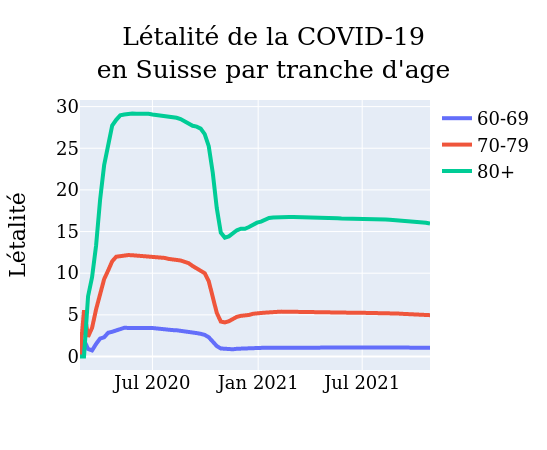

In [19]:
# We can now compare the time evolution
# of COVID case fatality rate of each age group

graph_title = "Létalité de la COVID-19<br>en Suisse par tranche d'age"
graph_yaxis = "Létalité"
picture_name = "CFR-par-tranche-age-en-Suisse"

fig = go.Figure()

fig.add_trace(go.Scatter(x=case_fatality_rate.index, y=case_fatality_rate['60'],
                    line=dict(width=4),
                    name='60-69'))

fig.add_trace(go.Scatter(x=case_fatality_rate.index, y=case_fatality_rate['70'],
                    line=dict(width=4),
                    name='70-79'))

fig.add_trace(go.Scatter(x=case_fatality_rate.index, y=case_fatality_rate['80'],
                    line=dict(width=4),
                    name='80+'))


fig.update_layout(

    showlegend=True,
    
    title={
        'text': graph_title,
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    
    #xaxis_title="log(n)",
    yaxis_title=graph_yaxis,
    #legend_title="Asset",
    
    font=dict(
        #family="Courier New",
        family='Roman',
        size=18,
        color="Black"
    )
)

fig.show()

fig.write_image("images/" + picture_name + ".pdf")
fig.write_image("images/" + picture_name + ".png")

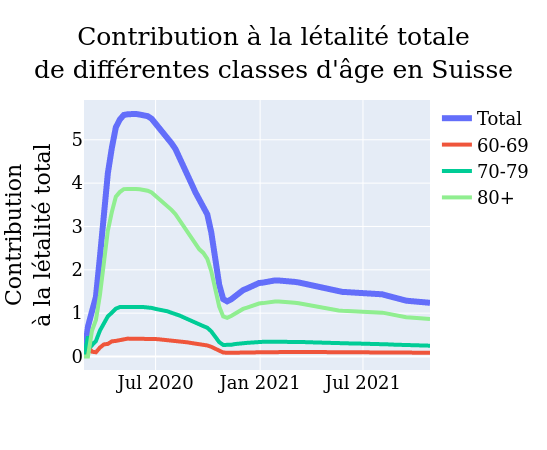

In [20]:
# Let us now compare the relative contribution of each age group
# to the total COVID case fatality rate

graph_title = "Contribution à la létalité totale<br>de différentes classes d'âge en Suisse"
graph_yaxis = "Contribution<br>à la létalité total"
picture_name = "CFR-Contribution-de-chaque-tranche-age-en-Suisse"

fig = go.Figure()

fig.add_trace(go.Scatter(x=case_fatality_rate_contribution.index, y=case_fatality_rate_contribution['Total'],
                    line=dict(width=6),
                    name='Total'))

fig.add_trace(go.Scatter(x=case_fatality_rate_contribution.index, y=case_fatality_rate_contribution['60'],
                    line=dict(width=4),
                    name='60-69'))

fig.add_trace(go.Scatter(x=case_fatality_rate_contribution.index, y=case_fatality_rate_contribution['70'],
                    line=dict(width=4),
                    name='70-79'))

fig.add_trace(go.Scatter(x=case_fatality_rate_contribution.index, y=case_fatality_rate_contribution['80'],
                    line=dict(width=4,color="lightgreen"),
                    name='80+'))


fig.update_layout(

    showlegend=True,
    
    title={
        'text': graph_title,
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    
    #xaxis_title="log(n)",
    yaxis_title=graph_yaxis,
    #legend_title="Asset",
    
    font=dict(
        #family="Courier New",
        family='Roman',
        size=18,
        color="Black"
    )
)

fig.show()

fig.write_image("images/" + picture_name + ".pdf")
fig.write_image("images/" + picture_name + ".png")